### Lab 11: Numpy Arrays
- Define a `ChessBoard` class:  
    - should have add_red method that accepts a row and column as input;  
    - should have add_blue method that accepts a row and column as input;  
    - should have render method that displays the chess board on screen with red and blue shown in correct locations;  
    - should have is_under_attack method that return boolean if red is under attack by a blue piece horizontally, vertically or diagonally.

In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
class ChessBoard:
    def __init__(self):
        # Colors
        self.white = (1, 1, 1)
        self.red = (1, .2, 0)
        self.blue = (.1, .1, 1)
        self.grid = np.zeros((8, 8, 3))

        # Queens
        self.red_queen = tuple()
        self.blue_queen = tuple()
        self.set_grid()

    def set_grid(self):
        for x in range(len(self.grid)):
            for y in range(len(self.grid[x])):
                if (x + y) % 2 == 0:
                    self.grid[x, y] = self.white
        
        if self.red_queen:
            self.grid[self.red_queen] = self.red
        if self.blue_queen:
            self.grid[self.blue_queen] = self.blue

    
    def add_red(self, row, col):
        self.red_queen = (row, col)
        self.set_grid()
    
    def add_blue(self, row, col):
        self.blue_queen = (row, col)
        self.set_grid()
    
    def render(self):
        plt.imshow(self.grid)
    
    def is_under_attack(self):
        return self.red_queen[0] == self.blue_queen[0] or \
                self.blue_queen[1] == self.blue_queen[1] or \
                abs(self.red_queen[0] - self.red_queen[1]) == abs(self.blue_queen[0] - self.blue_queen[1])


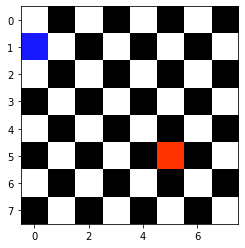

In [26]:
new_board = ChessBoard()
new_board.add_red(0, 0)
new_board.add_blue(1, 0)

new_board.add_red(5,5)
new_board.render()

### User Acceptance Tests
- queens on same row should be “under attack”;  
- queens on same column should be “under attack”;  
- queens on same diagonal should be “under attack”;  
- queens with any other coordinates should NOT be “under attack”

In [27]:
class TestChessBoard:
    def __init__(self):
        self.chessboard = ChessBoard()

    def test_same_row(self):
        self.chessboard.add_red(1, 0)
        self.chessboard.add_blue(1, 6)
        return self.chessboard.is_under_attack()

    def test_same_column(self):
        self.chessboard.add_red(3, 4)
        self.chessboard.add_blue(1, 4)
        return self.chessboard.is_under_attack()

    def test_same_diagonal(self):
        self.chessboard.add_red(3, 0)
        self.chessboard.add_blue(7, 4)
        return self.chessboard.is_under_attack()

    def test_not_ander_attack(self):
        self.chessboard.add_red(2, 5)
        self.chessboard.add_blue(7, 2)
        return self.chessboard.is_under_attack()

Test same row: PASS [blue queen: (1, 6) red queen:(1, 0)]


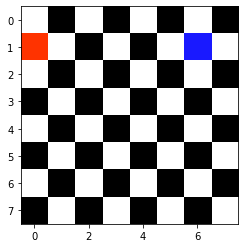

In [28]:
new_test = TestChessBoard()
print(f'Test same row:', 'PASS' if new_test.test_same_row() else 'FAIL', f'[blue queen: {new_test.chessboard.blue_queen} red queen:{new_test.chessboard.red_queen}]')
new_test.chessboard.render()


Test same column: PASS [blue queen: (1, 4) red queen:(3, 4)]


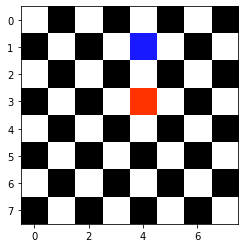

In [29]:
new_test = TestChessBoard()

print(f'Test same column:', 'PASS' if new_test.test_same_column() else 'FAIL', f'[blue queen: {new_test.chessboard.blue_queen} red queen:{new_test.chessboard.red_queen}]')

new_test.chessboard.render()

Test same diagonal: PASS [blue queen: (7, 4) red queen:(3, 0)]


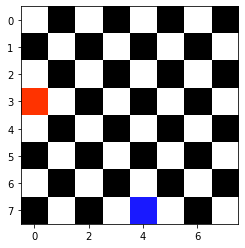

In [30]:
new_test = TestChessBoard()

print(f'Test same diagonal:', 'PASS' if new_test.test_same_diagonal() else 'FAIL', f'[blue queen: {new_test.chessboard.blue_queen} red queen:{new_test.chessboard.red_queen}]')

new_test.chessboard.render()

In [ ]:
new_test = TestChessBoard()

print(f'Test not under attack:', 'PASS' if new_test.test_same_column() else 'FAIL', f'[blue queen: {new_test.chessboard.blue_queen} red queen:{new_test.chessboard.red_queen}]')

new_test.chessboard.render()

Test not under attack: PASS blue queen: (7, 2) red queen:(2, 5)


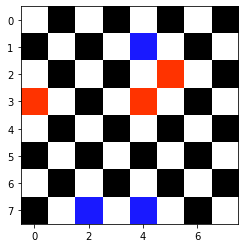

In [178]:
new_test = TestChessBoard()
print(f'Test not under attack:', 'PASS' if new_test.test_not_under_attack() else 'FAIL', f'blue queen: {new_test.chessboard.blue_queen} red queen:{new_test.chessboard.red_queen}')
new_test.chessboard.render()